# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
#solution
data = pd.read_csv("../Homework1/students_score_clean.csv",index_col = 0)

#drop non-numeric columns
data = data.drop(['Gender', 'LunchType'], axis=1)

data.head()

,StudentId,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
Unnamed: 0,,,,,,,,,,,,,,,,,
0.0,520645.0,2,1,1,1,1,1,3.0,1,1,71.0,71.0,74.0,1.0,0.0,0.0,1.0
1.0,303683.0,2,5,1,1,2,1,0.0,2,0,69.0,90.0,88.0,1.0,0.0,0.0,1.0
2.0,457351.0,1,3,1,2,2,1,4.0,1,1,87.0,93.0,91.0,1.0,0.0,0.0,1.0
3.0,812988.0,0,0,1,1,0,0,1.0,2,0,45.0,56.0,42.0,0.0,1.0,1.0,0.0
4.0,594678.0,2,5,1,1,2,1,0.0,1,0,76.0,78.0,75.0,0.0,1.0,0.0,1.0


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [3]:
#solution
data['MathScore'] = pd.cut(data['MathScore'], bins=[0, 49, 62, 74, 87, 100], labels=[1, 2, 3, 4, 5])

data.head()

,StudentId,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
Unnamed: 0,,,,,,,,,,,,,,,,,
0.0,520645.0,2,1,1,1,1,1,3.0,1,1,3,71.0,74.0,1.0,0.0,0.0,1.0
1.0,303683.0,2,5,1,1,2,1,0.0,2,0,3,90.0,88.0,1.0,0.0,0.0,1.0
2.0,457351.0,1,3,1,2,2,1,4.0,1,1,4,93.0,91.0,1.0,0.0,0.0,1.0
3.0,812988.0,0,0,1,1,0,0,1.0,2,0,1,56.0,42.0,0.0,1.0,1.0,0.0
4.0,594678.0,2,5,1,1,2,1,0.0,1,0,4,78.0,75.0,0.0,1.0,0.0,1.0


3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [4]:
#X (all features except MathScore, ReadingScore, WritingScore) and y (MathScore)
# transforming the data has set some values to NaN, so we need to drop them:
data = data.dropna()
print(data.isna().sum())

X = data.drop(['MathScore','ReadingScore','WritingScore'],axis = 1)
y = data['MathScore']

StudentId                 0
EthnicGroup               0
ParentEduc                0
TestPrep                  0
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
NrSiblings                0
TransportMeans            0
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
Gender_female             0
Gender_male               0
LunchType_free/reduced    0
LunchType_standard        0
dtype: int64


In [5]:
#splitting the dataset into train and test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

c:\Users\Francisco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Francisco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Francisco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1097
           2       0.32      0.12      0.17      2003
           3       0.29      0.85      0.43      2251
           4       0.33      0.11      0.16      1797
           5       0.00      0.00      0.00       701

    accuracy                           0.30      7849
   macro avg       0.19      0.21      0.15      7849
weighted avg       0.24      0.30      0.21      7849



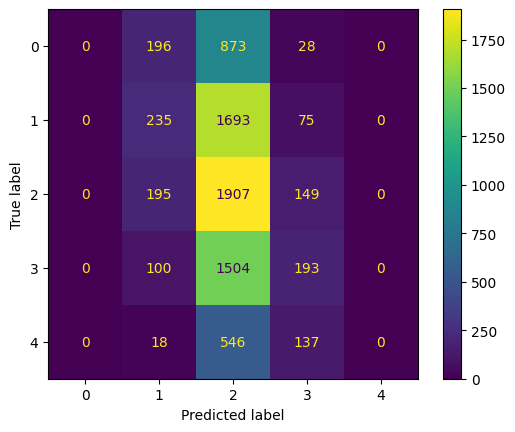

In [6]:
#Random Forest model
rfc = RandomForestClassifier(max_depth=5, n_estimators=20)
rfc.fit(X_train,y_train)

#prediction
y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [7]:
#transform grades into failed (0) or passed (1)
data['MathScore'] = data['MathScore'].replace([1],0)
data['MathScore'] = data['MathScore'].replace([2,3,4,5],1)

data.head()

,StudentId,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
Unnamed: 0,,,,,,,,,,,,,,,,,
0.0,520645.0,2,1,1,1,1,1,3.0,1,1,1,71.0,74.0,1.0,0.0,0.0,1.0
1.0,303683.0,2,5,1,1,2,1,0.0,2,0,1,90.0,88.0,1.0,0.0,0.0,1.0
2.0,457351.0,1,3,1,2,2,1,4.0,1,1,1,93.0,91.0,1.0,0.0,0.0,1.0
3.0,812988.0,0,0,1,1,0,0,1.0,2,0,0,56.0,42.0,0.0,1.0,1.0,0.0
4.0,594678.0,2,5,1,1,2,1,0.0,1,0,1,78.0,75.0,0.0,1.0,0.0,1.0


c:\Users\Francisco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Francisco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Francisco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1103
           1       0.86      1.00      0.92      6746

    accuracy                           0.86      7849
   macro avg       0.43      0.50      0.46      7849
weighted avg       0.74      0.86      0.79      7849



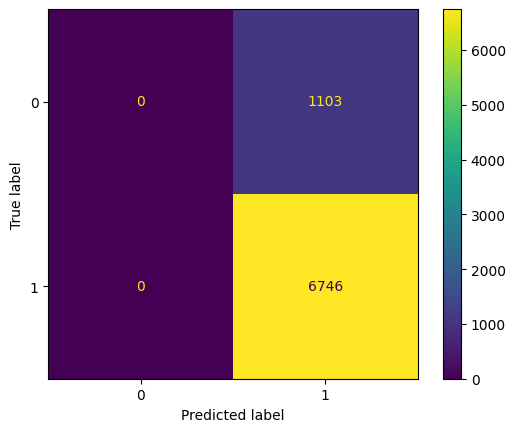

In [8]:
X = data.drop(['MathScore','ReadingScore','WritingScore'],axis = 1)
y = data['MathScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Random Forest model
rfc = RandomForestClassifier(max_depth=5, n_estimators=20)
rfc.fit(X_train,y_train)

#prediction
y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

The second model is better because it has only two classes, so it is easier to predict due to it generalize better. The first model has 5 classes, so it is harder to predict. The way to improve it is to use more data to train the model and to use features that are more correlated with the dependent variable and to remove features that are not correlated with the dependent variable. Using a complex model can also improve the model but it can also lead to overfitting. Resuming, the model can be improved by using more data, using features that are more correlated with the dependent variable and by using a complex model.